In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_df=pd.read_csv('cancer.csv')
data_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


### Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [3]:
data_df.shape

(699, 14)

In [4]:
data_df.dtypes

ID                               int64
ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
Unnamed: 11                    float64
Unnamed: 12                    float64
Unnamed: 13                    float64
dtype: object

In [5]:
data_df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [6]:
# Bare nuclei is taken as object typeeven thoughit has numerical values.
data_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,0.0,0.0,0.0
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557,NaN,NaN,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273,NaN,NaN,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,NaN,NaN,NaN
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,NaN,NaN,NaN


In [8]:
data_df = data_df.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1)
#dropped null values

In [10]:
data_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
data_df= data_df.drop('ID',1)
#dropped ID column as it adds more redudancy to the model

In [13]:
data_df.skew()

ClumpThickness                 0.592859
Cell Size                      1.233137
Cell Shape                     1.161859
Marginal Adhesion              1.524468
Single Epithelial Cell Size    1.712172
Normal Nucleoli                1.099969
Bland Chromatin                1.422261
Mitoses                        3.560658
Class                          0.654564
dtype: float64

In [15]:
data_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [17]:
for i in data_df.columns:
    print(data_df[i])
    print(data_df[i].value_counts())
    print('\n')

0      5
1      5
2      3
3      6
4      4
      ..
694    3
695    2
696    5
697    4
698    4
Name: ClumpThickness, Length: 699, dtype: int64
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: ClumpThickness, dtype: int64


0       1
1       4
2       1
3       8
4       1
       ..
694     1
695     1
696    10
697     8
698     8
Name: Cell Size, Length: 699, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Cell Size, dtype: int64


0       1
1       4
2       1
3       8
4       1
       ..
694     1
695     1
696    10
697     6
698     8
Name: Cell Shape, Length: 699, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Cell Shape, dtype: int64


0      1
1      5
2      1
3      1
4      3
      ..
694    1
695    1
696    3
697    4
698    5
Name: Marginal Adhesion, Length: 699, dtype: 

In [18]:
data_df['Bare Nuclei'].value_counts()
#noticed question mark in above feature, lets replace with np.nan

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [19]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].replace({'?':np.nan})
#replaced '?' with np.nan

In [20]:
data_df['Bare Nuclei'].isna().sum()
#There were 16 null values present

16

In [21]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('float')

In [22]:
data_df['Bare Nuclei'].skew()

0.9900156547006164

In [24]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].fillna(data_df['Bare Nuclei'].median())

In [25]:
x =data_df.drop('Class',1)

In [26]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


In [27]:
df_scaled=x_scaled[~((x_scaled<(-3)) | (x_scaled>(3))).any(axis=1)]
df_scaled.shape

(648, 9)

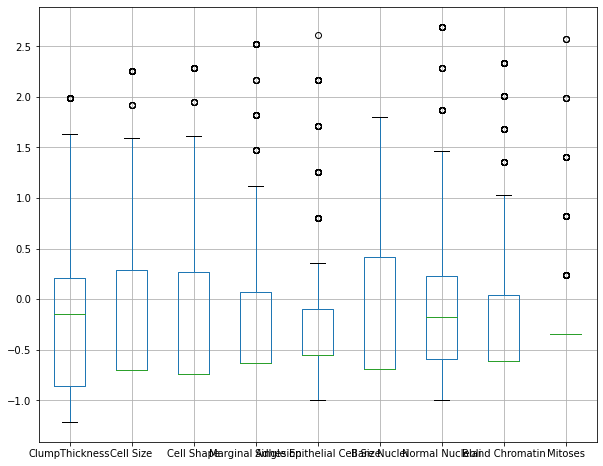

In [28]:
plt.figure(figsize=(10,8))
df_scaled.boxplot()
plt.show()

# PCA

In [29]:
from sklearn.decomposition import PCA
pca  = PCA()
pc = pca.fit_transform(df_scaled)
var  = pca.explained_variance_ratio_
var

array([0.68105892, 0.07363693, 0.06526949, 0.04194172, 0.03875889,
       0.03809531, 0.02867096, 0.02101637, 0.01155142])

In [30]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.68105892, 0.75469585, 0.81996533, 0.86190705, 0.90066594,
       0.93876125, 0.96743221, 0.98844858, 1.        ])

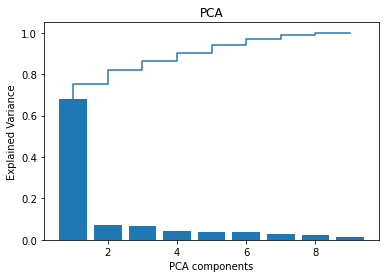

In [31]:
plt.bar(range(1,10),var)
plt.step(range(1,10),cum_var)

plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.title('PCA')
plt.show()

PCA with reduced dimensions

In [32]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=0.95)
pca_red = pca.fit_transform(df_scaled)
var_red  = pca.explained_variance_ratio_
var_red

array([0.68105892, 0.07363693, 0.06526949, 0.04194172, 0.03875889,
       0.03809531, 0.02867096])

In [33]:
cum_var_red = np.cumsum(pca.explained_variance_ratio_)
cum_var_red

array([0.68105892, 0.75469585, 0.81996533, 0.86190705, 0.90066594,
       0.93876125, 0.96743221])

In [34]:
df_pca = pd.DataFrame(pca_red,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.119088,-0.618990,0.153865,0.338794,-0.306673,-0.139063,0.205592
1,1.770913,0.051193,-1.240357,-0.722281,0.852803,0.625061,1.154753
2,-1.248004,-0.016819,-0.117493,0.379186,-0.114963,0.142602,0.105504
3,1.916570,-0.129812,1.575628,-0.302005,0.973741,0.217791,-1.205177
4,-0.993257,-0.123108,-0.245625,0.133778,-0.488156,-0.484044,0.174866
